# Cleaning Data Part 2 - Meat and Salaries

This notebook will cover merging, joining, and concatenating data using Pandas. A comprehensive guide to the multiple methods used for performing these actions can be found in the Pandas documentation [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html).

The question this notebook seeks to answer is: **How much do we spend on meat?**

The data from this notebook (meat prices and average wages) comes from the [National Statistics Office of Mongolia](1212.mn). You can also find a more complete exploration of this data [here](https://github.com/robertritz/Mongolian-Data-Stories/tree/master/Meat%20Prices).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 8)

## Import Data

In [2]:
salary = pd.read_csv('Average Wages and Salaries by Month in UB - DT_NSO_0400_021V1_-_2019-04-25_-_www.1212.mn.csv', thousands=',')

In [3]:
meat = pd.read_csv('Monthly Meat Prices UB - DT_NSO_0600_019V1_-_2019-05-16_-_www.1212.mn.csv', thousands=',')

In [4]:
salary.head()

,Aimag,Sex,2000-IV,2001-I,2001-II,2001-III,2001-IV,2002-I,2002-II,2002-III,...,2016-III,2016-IV,2017-I,2017-II,2017-III,2017-IV,2018-I,2018-II,2018-III,2018-IV
0,Ulaanbaatar,Total,74.4,73.4,81.5,78.4,76.7,77.0,81.6,83.4,...,NaN,1053.3,1081.4,1099.8,1075.1,1167.8,1116.6,1147.3,1156.2,1255.7


In [5]:
meat.head(5)

,Goods and services,Aimag,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,...,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04
0,"Beef, without bones, kg",Ulaanbaatar,4640,5380,5415,5070,4845,5160,5290,5515,...,10814,9981,9480,9360,9349,10000,10794,11062,11293,11801
1,"Mutton, with bones, kg",Ulaanbaatar,3710,4205,4250,3810,3610,4105,4040,4244,...,7533,6977,6412,6437,6689,6692,7156,7324,7938,8710
2,"Goat meat, with bones, kg",Ulaanbaatar,2590,3165,3395,3260,2805,3045,3050,3180,...,5504,5244,4700,4815,4973,5319,5809,5966,6020,6399
3,"Chicken, thigh, kg, imported",Ulaanbaatar,4420,4285,4195,4090,3910,3830,3850,3750,...,6921,7045,6858,7136,7536,7742,8067,8091,8233,8233
4,"Horse meat, with bones, kg",Ulaanbaatar,2710,3460,3605,3535,3290,3370,3630,3705,...,6831,6274,6081,5845,5868,6378,6702,6747,6745,6721


In [6]:
salary.dtypes

Aimag        object
Sex          object
2000-IV     float64
2001-I      float64
2001-II     float64
             ...   
2017-IV     float64
2018-I      float64
2018-II     float64
2018-III    float64
2018-IV     float64
Length: 72, dtype: object

In [7]:
meat.dtypes

Goods and services    object
Aimag                 object
2010-12                int64
2011-01                int64
2011-02                int64
                       ...  
2018-12                int64
2019-01                int64
2019-02                int64
2019-03                int64
2019-04                int64
Length: 103, dtype: object

Melt allows you to reorganize your data from a short form to long form. This is also known as "un-pivoting". [Melt documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html).

In [8]:
salary = salary.melt(id_vars=['Aimag','Sex'], var_name='date', value_name='salary')

In [9]:
salary

,Aimag,Sex,date,salary
0,Ulaanbaatar,Total,2000-IV,74.4
1,Ulaanbaatar,Total,2001-I,73.4
2,Ulaanbaatar,Total,2001-II,81.5
3,Ulaanbaatar,Total,2001-III,78.4
4,Ulaanbaatar,Total,2001-IV,76.7
...,...,...,...,...
65,Ulaanbaatar,Total,2017-IV,1167.8
66,Ulaanbaatar,Total,2018-I,1116.6
67,Ulaanbaatar,Total,2018-II,1147.3
68,Ulaanbaatar,Total,2018-III,1156.2


In [10]:
meat = meat.melt(id_vars=['Goods and services','Aimag'], var_name='date', value_name='price')

In [11]:
meat

,Goods and services,Aimag,date,price
0,"Beef, without bones, kg",Ulaanbaatar,2010-12,4640.0
1,"Mutton, with bones, kg",Ulaanbaatar,2010-12,3710.0
2,"Goat meat, with bones, kg",Ulaanbaatar,2010-12,2590.0
3,"Chicken, thigh, kg, imported",Ulaanbaatar,2010-12,4420.0
4,"Horse meat, with bones, kg",Ulaanbaatar,2010-12,2710.0
...,...,...,...,...
500,"Beef, without bones, kg",Ulaanbaatar,2019-04,11801.0
501,"Mutton, with bones, kg",Ulaanbaatar,2019-04,8710.0
502,"Goat meat, with bones, kg",Ulaanbaatar,2019-04,6399.0
503,"Chicken, thigh, kg, imported",Ulaanbaatar,2019-04,8233.0


## Filter By Horse

For this analysis we want to keep it simple, so we will filter for one meat type. 

In [12]:
meat = meat[meat['Goods and services'] == 'Horse meat, with bones, kg']

In [13]:
meat

,Goods and services,Aimag,date,price
4,"Horse meat, with bones, kg",Ulaanbaatar,2010-12,2710.0
9,"Horse meat, with bones, kg",Ulaanbaatar,2011-01,3460.0
14,"Horse meat, with bones, kg",Ulaanbaatar,2011-02,3605.0
19,"Horse meat, with bones, kg",Ulaanbaatar,2011-03,3535.0
24,"Horse meat, with bones, kg",Ulaanbaatar,2011-04,3290.0
...,...,...,...,...
484,"Horse meat, with bones, kg",Ulaanbaatar,2018-12,6378.0
489,"Horse meat, with bones, kg",Ulaanbaatar,2019-01,6702.0
494,"Horse meat, with bones, kg",Ulaanbaatar,2019-02,6747.0
499,"Horse meat, with bones, kg",Ulaanbaatar,2019-03,6745.0


In [17]:
meat = meat.reset_index(drop=True)

## Convert Dates

Converting datetimes is a very common data cleaning task. `pd.to_datetime` is the main method you will use. Pandas will try to guess your format, but occasionally it doesn't get it right. If that happens you can specify a format using these [codes](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes).

In [18]:
meat['date'] = pd.to_datetime(meat['date'])

In [19]:
meat.dtypes

Goods and services            object
Aimag                         object
date                  datetime64[ns]
price                        float64
dtype: object

Salary dates are actually in quarters! This isn't directly supported with `to_datetime`, so we will have to work around this.

In [27]:
salary['quarter'] = salary['date'].str.split('-').str.get(1)

In [28]:
salary['year'] = salary['date'].str.split('-').str.get(0)

In [29]:
salary['year']

0     2000
1     2001
2     2001
3     2001
4     2001
      ... 
65    2017
66    2018
67    2018
68    2018
69    2018
Name: year, Length: 70, dtype: object

In [30]:
salary

,Aimag,Sex,date,salary,quarter,year
0,Ulaanbaatar,Total,2000-IV,74.4,IV,2000
1,Ulaanbaatar,Total,2001-I,73.4,I,2001
2,Ulaanbaatar,Total,2001-II,81.5,II,2001
3,Ulaanbaatar,Total,2001-III,78.4,III,2001
4,Ulaanbaatar,Total,2001-IV,76.7,IV,2001
...,...,...,...,...,...,...
65,Ulaanbaatar,Total,2017-IV,1167.8,IV,2017
66,Ulaanbaatar,Total,2018-I,1116.6,I,2018
67,Ulaanbaatar,Total,2018-II,1147.3,II,2018
68,Ulaanbaatar,Total,2018-III,1156.2,III,2018


In [31]:
mapper = {'I':3,'II':6,'III':9,'IV':12}

In [32]:
salary['quarter'] = salary['quarter'].map(mapper)

In [34]:
salary

,Aimag,Sex,date,salary,quarter,year,temp_date
0,Ulaanbaatar,Total,2000-IV,74.4,12,2000,2000-12
1,Ulaanbaatar,Total,2001-I,73.4,3,2001,2001-3
2,Ulaanbaatar,Total,2001-II,81.5,6,2001,2001-6
3,Ulaanbaatar,Total,2001-III,78.4,9,2001,2001-9
4,Ulaanbaatar,Total,2001-IV,76.7,12,2001,2001-12
...,...,...,...,...,...,...,...
65,Ulaanbaatar,Total,2017-IV,1167.8,12,2017,2017-12
66,Ulaanbaatar,Total,2018-I,1116.6,3,2018,2018-3
67,Ulaanbaatar,Total,2018-II,1147.3,6,2018,2018-6
68,Ulaanbaatar,Total,2018-III,1156.2,9,2018,2018-9


In [36]:
salary['temp_date'] = salary['year'].astype('str') + '-' + salary['quarter'].astype('str')

In [37]:
salary['temp_date']

0     2000-12
1      2001-3
2      2001-6
3      2001-9
4     2001-12
       ...   
65    2017-12
66     2018-3
67     2018-6
68     2018-9
69    2018-12
Name: temp_date, Length: 70, dtype: object

In [38]:
salary['date'] = pd.to_datetime(salary['temp_date'])

In [39]:
salary.head()

,Aimag,Sex,date,salary,quarter,year,temp_date
0,Ulaanbaatar,Total,2000-12-01,74.4,12,2000,2000-12
1,Ulaanbaatar,Total,2001-03-01,73.4,3,2001,2001-3
2,Ulaanbaatar,Total,2001-06-01,81.5,6,2001,2001-6
3,Ulaanbaatar,Total,2001-09-01,78.4,9,2001,2001-9
4,Ulaanbaatar,Total,2001-12-01,76.7,12,2001,2001-12


In [42]:
meat.head()

,Goods and services,Aimag,date,price
0,"Horse meat, with bones, kg",Ulaanbaatar,2010-12-01,2710.0
1,"Horse meat, with bones, kg",Ulaanbaatar,2011-01-01,3460.0
2,"Horse meat, with bones, kg",Ulaanbaatar,2011-02-01,3605.0
3,"Horse meat, with bones, kg",Ulaanbaatar,2011-03-01,3535.0
4,"Horse meat, with bones, kg",Ulaanbaatar,2011-04-01,3290.0


### Check dates

In [40]:
meat.dtypes

Goods and services            object
Aimag                         object
date                  datetime64[ns]
price                        float64
dtype: object

In [43]:
salary.dtypes

Aimag                object
Sex                  object
date         datetime64[ns]
salary              float64
quarter               int64
year                 object
temp_date            object
dtype: object

## Merge Data

`merge`, `concat`, and `append` are the main methods for merging data in Pandas. Here are some examples of each.

An example of a `concat`. Concatenation works along an axis and their values.

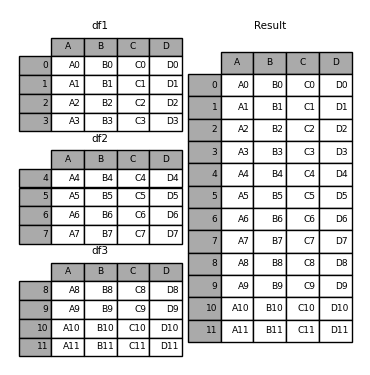

An example of `append`. Appending adds data to the end of a dataframe. 

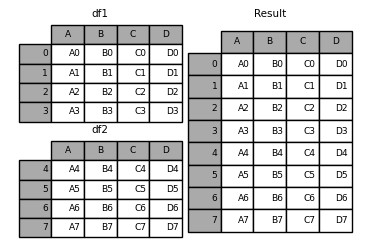

An example of `merge`. Merge does SQL style joins on your data.

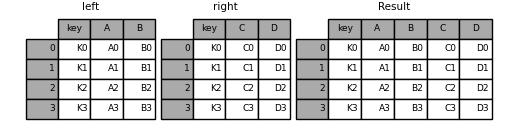

Since we want to join our data on a key (`date`), we will use merge.

In [44]:
meat = meat[['date','price']]

In [45]:
salary = salary[['date','salary']]

In [46]:
meat = meat.merge(salary, how='left', on='date')

In [47]:
meat.head(10)

,date,price,salary
0,2010-12-01,2710.0,416.4
1,2011-01-01,3460.0,NaN
2,2011-02-01,3605.0,NaN
3,2011-03-01,3535.0,430.3
4,2011-04-01,3290.0,NaN
5,2011-05-01,3370.0,NaN
6,2011-06-01,3630.0,462.1
7,2011-07-01,3705.0,NaN
8,2011-08-01,3690.0,NaN
9,2011-09-01,3650.0,478.6


## Fill NA's

In [48]:
meat['salary'] = meat['salary'].fillna(method='ffill')

In [49]:
meat

,date,price,salary
0,2010-12-01,2710.0,416.4
1,2011-01-01,3460.0,416.4
2,2011-02-01,3605.0,416.4
3,2011-03-01,3535.0,430.3
4,2011-04-01,3290.0,430.3
...,...,...,...
96,2018-12-01,6378.0,1255.7
97,2019-01-01,6702.0,1255.7
98,2019-02-01,6747.0,1255.7
99,2019-03-01,6745.0,1255.7


## Visualize the combined data.

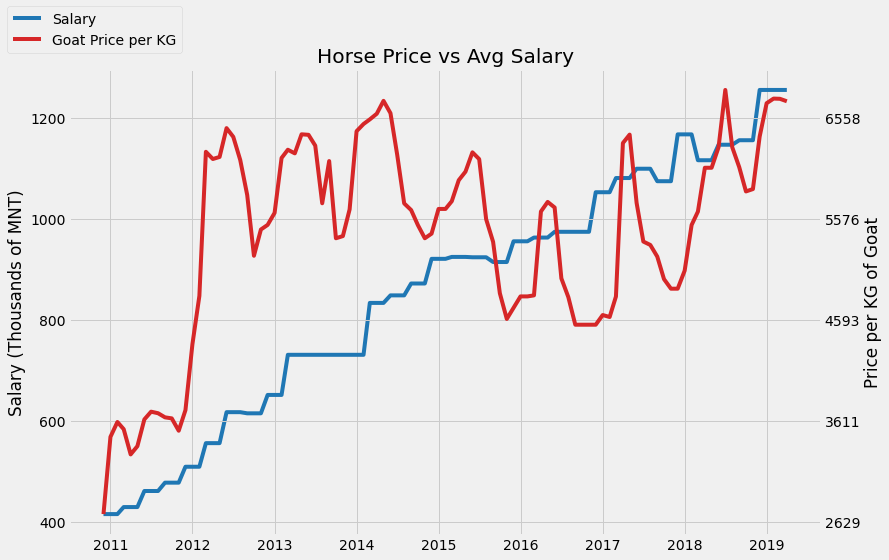

In [51]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Set title
ax1.set_title('Horse Price vs Avg Salary')

# Make first plot on ax1
ax1.plot(meat['date'], meat['salary'], color='tab:blue')
ax1.set_ylabel('Salary (Thousands of MNT)')

# Make second plot on ax2
ax2.plot(meat['date'], meat['price'], color='tab:red')
ax2.set_ylabel('Price per KG of Goat')

# Create Legend
fig.legend(['Salary','Goat Price per KG'], loc='upper left')

# This code sync the dual axes so the tick marks match. This isn't necessary but makes it look good!
l1 = ax1.get_ylim()
l2 = ax2.get_ylim()
f = lambda x : l2[0]+(x-l1[0])/(l1[1]-l1[0])*(l2[1]-l2[0])
ticks = f(ax1.get_yticks())
ax2.yaxis.set_major_locator(matplotlib.ticker.FixedLocator(ticks))